In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# index_col tells Pandas the first col is an index, not data
# notice that the first col in the csv file is an index integer
# if we omit index_col=0, Pandas will treat it as data (but
# lacking a name)
a = pd.read_csv("../data/AppleStore.csv", index_col=0)

Three useful commands for checking the data was read in as we expect

In [9]:
!head ../data/AppleStore.csv

"","id","track_name","size_bytes","currency","price","rating_count_tot","rating_count_ver","user_rating","user_rating_ver","ver","cont_rating","prime_genre","sup_devices.num","ipadSc_urls.num","lang.num","vpp_lic"
"1","281656475","PAC-MAN Premium",100788224,"USD",3.99,21292,26,4,4.5,"6.3.5","4+","Games",38,5,10,1
"2","281796108","Evernote - stay organized",158578688,"USD",0,161065,26,4,3.5,"8.2.2","4+","Productivity",37,5,23,1
"3","281940292","WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,"USD",0,188583,2822,3.5,4.5,"5.0.0","4+","Weather",37,5,3,1
"4","282614216","eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,"USD",0,262241,649,4,4.5,"5.10.0","12+","Shopping",37,5,9,1
"5","282935706","Bible",92774400,"USD",0,985920,5320,4.5,5,"7.5.1","4+","Reference",37,5,45,1
"6","283619399","Shanghai Mahjong",10485713,"USD",0.99,8253,5516,4,4,"1.8","4+","Games",47,5,1,1
"7","283646709","PayPal - Send and request money safely",227795968,"USD",0,119487,879,4,4.5,"6.12.0","4

In [3]:
a.shape # rows and columns

(7197, 16)

In [4]:
a.head() # take a quick look

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
a.dtypes # what types have the columns?

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

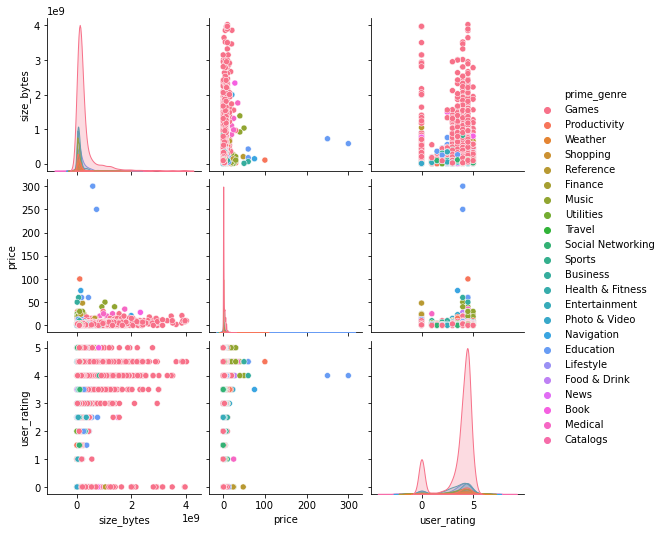

In [7]:
# pairplot. Consult Seaborn docs if needed
sns.pairplot(a, vars=["size_bytes", "price", "user_rating"], hue="prime_genre")

In [15]:
a[['user_rating','prime_genre']].groupby('prime_genre').max()

,user_rating
prime_genre,
Book,5.0
Business,5.0
Catalogs,5.0
Education,5.0
Entertainment,5.0
Finance,5.0
Food & Drink,5.0
Games,5.0
Health & Fitness,5.0


In [ ]:
# groupby a categorical column. .mean() takes the mean of all numerical columns.
# we select the ones we want

In [ ]:
# one method
a[['user_rating','prime_genre']].groupby('prime_genre').max()

In [18]:
# alternative
g = a.groupby("prime_genre").mean()["user_rating"]
g

prime_genre
Book                 2.477679
Business             3.745614
Catalogs             2.100000
Education            3.376380
Entertainment        3.246729
Finance              2.432692
Food & Drink         3.182540
Games                3.685008
Health & Fitness     3.700000
Lifestyle            2.805556
Medical              3.369565
Music                3.978261
Navigation           2.684783
News                 2.980000
Photo & Video        3.800860
Productivity         4.005618
Reference            3.453125
Shopping             3.540984
Social Networking    2.985030
Sports               2.982456
Travel               3.376543
Utilities            3.278226
Weather              3.597222
Name: user_rating, dtype: float64

In [46]:
# to_csv saves to csv. header=True tells it to write column headers
g.to_csv("rating_by_genre.csv", header=True)

In [47]:
# I'm using !cat to run the cat command (might not work on Windows)
# but you can just open in Excel/Notepad/etc to confirm it worked ok
!cat rating_by_genre.csv

prime_genre,user_rating
Book,2.4776785714285716
Business,3.745614035087719
Catalogs,2.1
Education,3.376379690949227
Entertainment,3.2467289719626167
Finance,2.4326923076923075
Food & Drink,3.1825396825396823
Games,3.6850077679958573
Health & Fitness,3.7
Lifestyle,2.8055555555555554
Medical,3.369565217391304
Music,3.9782608695652173
Navigation,2.6847826086956523
News,2.98
Photo & Video,3.8008595988538683
Productivity,4.00561797752809
Reference,3.453125
Shopping,3.540983606557377
Social Networking,2.9850299401197606
Sports,2.982456140350877
Travel,3.376543209876543
Utilities,3.278225806451613
Weather,3.5972222222222223
